<a href="https://colab.research.google.com/github/JG-geek/Diffusion_Models/blob/main/avgpool_NNupsample_conditioned_diffusion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -q diffusers

In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from diffusers import DDPMScheduler, UNet2DModel
from matplotlib import pyplot as plt
from tqdm.auto import tqdm


100%|██████████| 9.91M/9.91M [00:00<00:00, 24.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 805kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.71MB/s]


Input shape: torch.Size([8, 1, 28, 28])
Labels: tensor([0, 5, 6, 9, 6, 3, 3, 5])


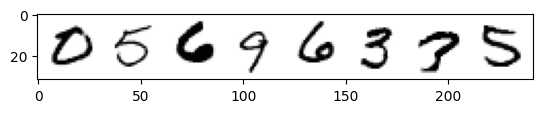

In [ ]:
# load the dataset
dataset = torchvision.datasets.MNIST(root='mnist/', train=True, download=True, transform=torchvision.transforms.ToTensor())

# Feed it into a dataloader (batch size 8 here just for demo)
train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# View some examples
x, y = next(iter(train_dataloader))
print('Input shape:', x.shape)
print('Labels:', y)
plt.imshow(torchvision.utils.make_grid(x)[0], cmap='Greys');

In [ ]:
def avgpool_then_upsample_batch(images, kernel_size=2, target_size=(28, 28)):
    """
    Applies average pooling followed by nearest neighbor upsampling to a batch of images.
    """

    assert images.ndim == 4 and images.shape[1:] == (1, 28, 28), "Expected input shape [B, 1, 28, 28]"

    # Apply average pooling
    pooled = nn.functional.avg_pool2d(images, kernel_size=kernel_size)

    # Nearest neighbor upsampling using interpolate
    upsampled = nn.functional.interpolate(pooled, size=target_size, mode='nearest')

    # # Nearest neighbor upsampling using upsample
    # upsample = nn.Upsample(size=target_size, mode='nearest')
    # upsampled2 = upsample(pooled)

    return upsampled

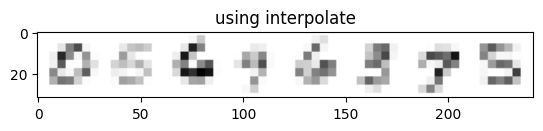

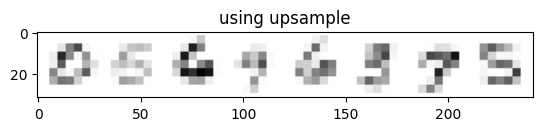

In [ ]:
x_modified1, x_modified2 = avgpool_then_upsample_batch(images=x, kernel_size=4)

plt.figure()
plt.imshow(torchvision.utils.make_grid(x_modified1)[0], cmap='Greys')
plt.title('using interpolate')
plt.show()

plt.figure()
plt.imshow(torchvision.utils.make_grid(x_modified2)[0], cmap='Greys')
plt.title('using upsample')
plt.show()

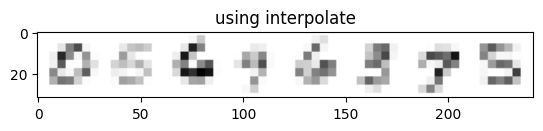

In [ ]:
x_modified = avgpool_then_upsample_batch(images=x, kernel_size=4)

plt.figure()
plt.imshow(torchvision.utils.make_grid(x_modified)[0], cmap='Greys')
plt.title('using interpolate')
plt.show()

In [ ]:
print(x[0].min().item(), x[0].max().item())
print(x_modified[0].min().item(), x_modified[0].max().item())

0.0 1.0
0.0 0.8593137860298157
